In [ ]:
"""
input:
    - eda_df.parquet
    - twitter.png
    - user.png
    - location.png
output:
    - tweet_user_geoloc_counts.png
"""

In [2]:
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
main_figures_path = "/figures/experimental/main_figures"
dataframes_path = "/data/processed/dataframes"

In [7]:
df_duplicates_removed = pd.read_parquet(f"{dataframes_path}/eda_df.parquet")

twitter_icon = Image.open(f"/figures/icons/twitter.png")
user_icon = Image.open(f"/figures/icons/user.png")
location_icon = Image.open(f"/figures/icons/location.png")

In [8]:
icon_size = 300

twitter_icon = twitter_icon.resize((icon_size, icon_size))
user_icon = user_icon.resize((icon_size, icon_size))
location_icon = location_icon.resize((icon_size, icon_size))

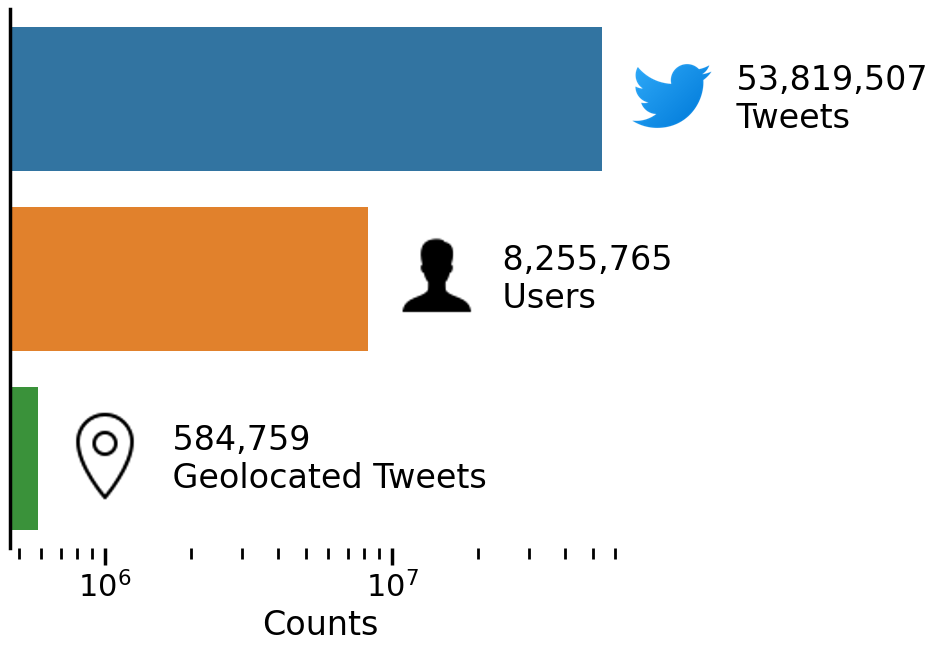

In [33]:
sns.set_context('poster', font_scale=1)
fig = plt.figure(figsize=(8, 8), dpi=300)
ax = sns.barplot(data=df_duplicates_removed, x='Counts', y='Labels', orient='h')

for idx, p in enumerate(ax.patches):
    ax.annotate(f"{'':12s}{df_duplicates_removed['Counts'].values[idx]:,}\n{'':12s}{df_duplicates_removed['Labels'].values[idx]}",
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.xscale('log')
ax.axes.yaxis.set_visible(False)

plt.figimage(twitter_icon, 1850, 1700)
plt.figimage(user_icon, 1150, 1075)
plt.figimage(location_icon, 180, 470)

sns.despine(bottom=True)
plt.savefig(f"{main_figures_path}/tweet_user_geoloc_counts.png", bbox_inches='tight')